# 1.Proje Açıklaması
### Proje Başlığı:
Diyabet Hastalığı Tahmini

### Projenin Amacı:
Bu projenin amacı, bireylerin çeşitli sağlık verileri kullanılarak Tip 2 diyabet hastalığına yakalanma riskini tahmin edebilen bir makine öğrenimi modeli geliştirmektir.

### Araştırma Sorusu:
Kişilerin sağlık verileri kullanılarak diyabet hastalığına yakalanıp yakalanmayacağı doğru bir şekilde tahmin edilebilir mi?

### Veri Seti Bilgileri:
Projede kullanılan veri seti, 100.000 bireye ait demografik ve sağlık verilerini içeren büyük ölçekli bir açık veri kümesidir. Veri seti çeşitli yaş gruplarından, cinsiyetlerden ve sağlık durumlarından bireyleri içermekte olup, daha genel ve temsili bir popülasyonu yansıtmaktadır.

gender: Bireyin cinsiyeti (Female, Male, Other)

age: Yaş (float)

hypertension: Yüksek tansiyon durumu (0 = Hayır, 1 = Evet)

heart_disease: Kalp hastalığı geçmişi (0 = Hayır, 1 = Evet)

smoking_history: Sigara içme geçmişi (No Info, never, current, former, etc.)

bmi: Vücut kitle indeksi (kg/m²)

HbA1c_level: Son 2-3 aylık ortalama kan şekeri seviyesini gösteren HbA1c değeri

blood_glucose_level: Anlık kan şekeri düzeyi

diabetes: Diyabet durumu (1 = Hasta, 0 = Sağlıklı)



# 2. 📦 Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
# Temel Kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

#Modelleme
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

#Ornekleme
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

#Decimal
pd.options.display.float_format = "{:.2f}".format


# 3. 📥 Verinin Yüklenmesi ve İlk İnceleme

In [ ]:
# Google Colab'a dosya yükleme
from google.colab import files
uploaded = files.upload()


df = pd.read_csv("diabetes_prediction_dataset.csv")


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# 4. 🔍 Keşifsel Veri Analizi (EDA)

In [ ]:
duplicateData = df[df.duplicated()]
print("Tekrarlanan Veri Sayısı: ", duplicateData.shape)

Tekrarlanan Veri Sayısı:  (3854, 9)


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
#Benzersiz Değerlerin Sayısını Bulma

for column in df.columns:
  distinctValue=len(df[column].unique())
  print(f"{column} sütunun benzersiz değer sayısı: {distinctValue}")

gender sütunun benzersiz değer sayısı: 3
age sütunun benzersiz değer sayısı: 102
hypertension sütunun benzersiz değer sayısı: 2
heart_disease sütunun benzersiz değer sayısı: 2
smoking_history sütunun benzersiz değer sayısı: 6
bmi sütunun benzersiz değer sayısı: 4247
HbA1c_level sütunun benzersiz değer sayısı: 18
blood_glucose_level sütunun benzersiz değer sayısı: 18
diabetes sütunun benzersiz değer sayısı: 2


In [ ]:
#Eksik Değer Kontrolü
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
for column in df.columns:
  print(f"{column} sütunun değer sayıları:\n {df[column].value_counts()}")

gender sütunun değer sayıları:
 gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
age sütunun değer sayıları:
 age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
hypertension sütunun değer sayıları:
 hypertension
0    88685
1     7461
Name: count, dtype: int64
heart_disease sütunun değer sayıları:
 heart_disease
0    92223
1     3923
Name: count, dtype: int64
smoking_history sütunun değer sayıları:
 smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64
bmi sütunun değer sayıları:
 bmi
27.32    21666
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
56.10        1
50.27        1
55.04        1
56.65        1
53.37        1
Name: count, Length: 4247, dtype: int64
HbA1c_level sü

In [ ]:
#96146 veride 18 tane Other değeri var gürültü oluşturmaması için çıkarılıyor
df = df[df['gender'] != 'Other']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
#verileri formatlayıp okunaklı hale getirme
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


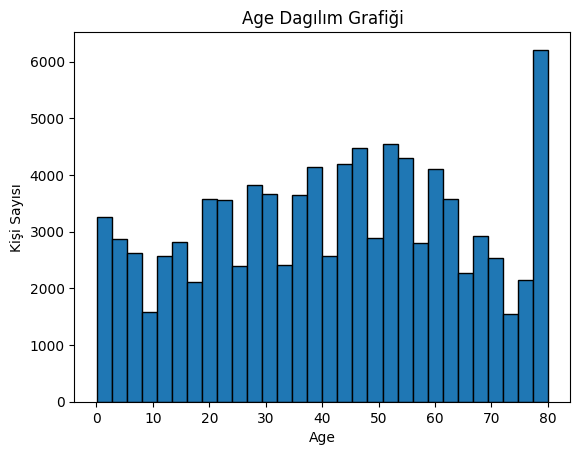

In [ ]:
# Age Dağılımı
plt.hist(df['age'], bins=30,edgecolor="black")
plt.title('Age Dagılım Grafiği')
plt.xlabel('Age')
plt.ylabel('Kişi Sayısı')
plt.show()

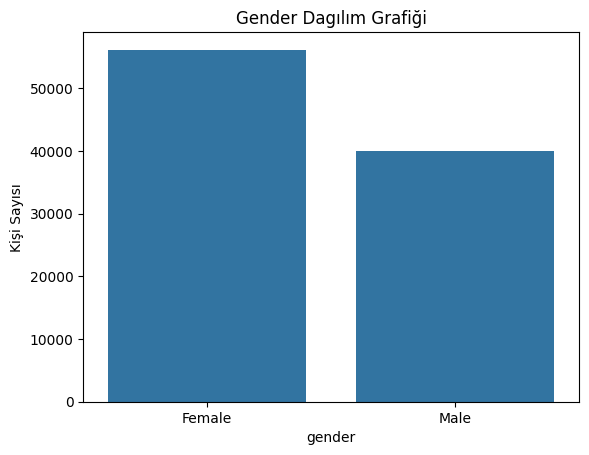

In [ ]:
# Gender Dağılımı
sns.countplot(x='gender', data=df)
plt.title('Gender Dagılım Grafiği')
plt.ylabel('Kişi Sayısı')
plt.show()

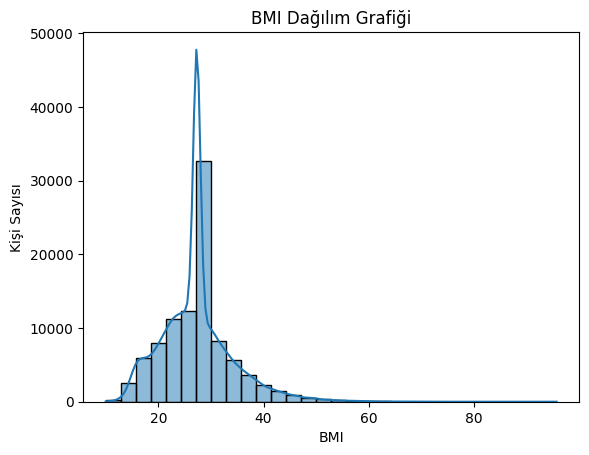

In [ ]:
# BMI Dağılımı
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title("BMI Dağılım Grafiği")
plt.xlabel("BMI")
plt.ylabel("Kişi Sayısı")
plt.show()

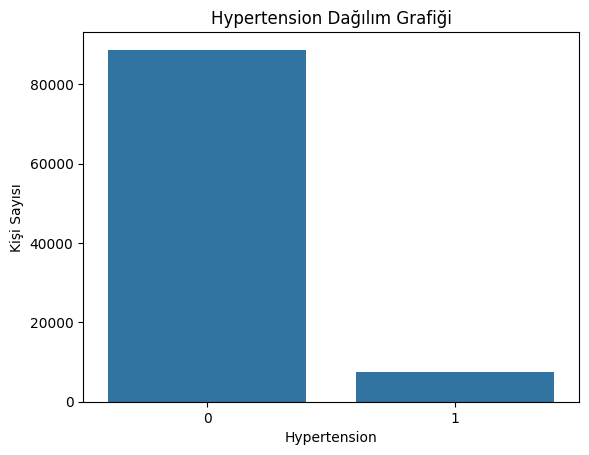

In [ ]:
#Hypertension Dağılımı
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Dağılım Grafiği')
plt.xlabel('Hypertension')
plt.ylabel('Kişi Sayısı')
plt.show()

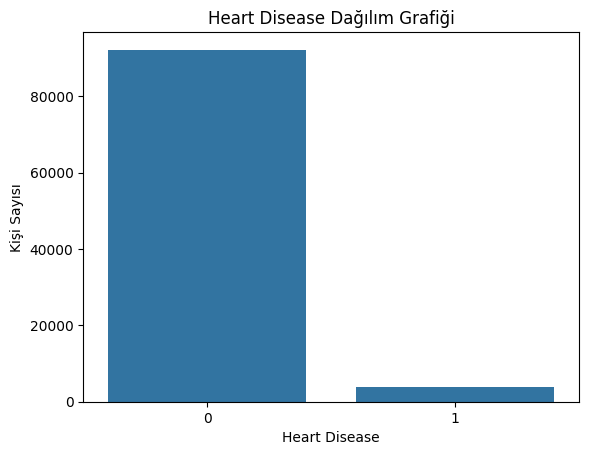

In [ ]:
#Heart Disease Dağılımı
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Dağılım Grafiği')
plt.xlabel('Heart Disease')
plt.ylabel('Kişi Sayısı')
plt.show()

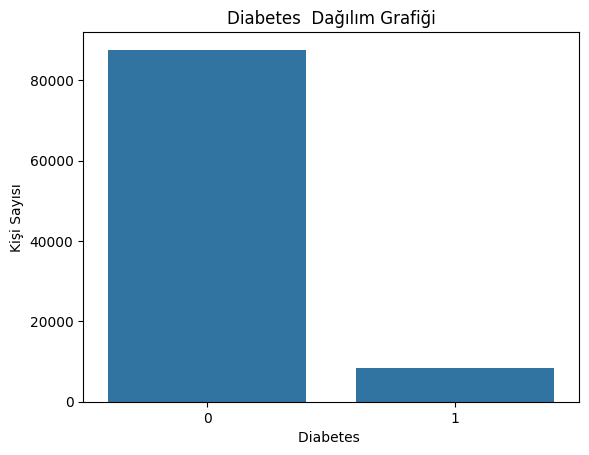

In [ ]:
#Diabetes  Dağılımı
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes  Dağılım Grafiği')
plt.xlabel('Diabetes ')
plt.ylabel('Kişi Sayısı')
plt.show()

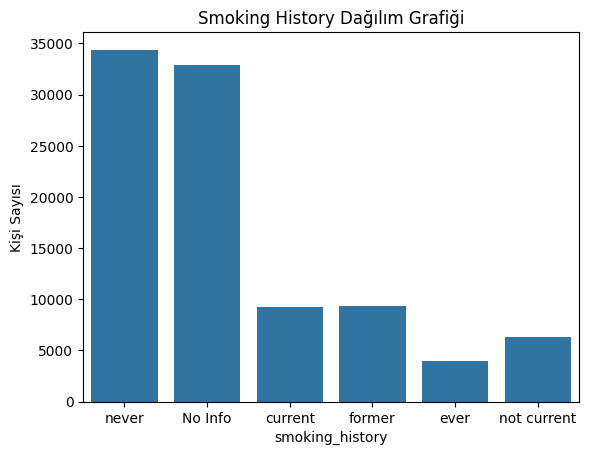

In [ ]:
#Countplot Grafiği
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Dağılım Grafiği')
plt.ylabel('Kişi Sayısı')
plt.show()

In [ ]:
#İki Değişkenli Analiz
#İki değişkenli analiz, "hangi değişken hedefi etkiliyor?" ve "bu etki güçlü mü?" gibi sorulara cevap vererek modelinin daha isabetli ve anlaşılır olmasını sağlar.

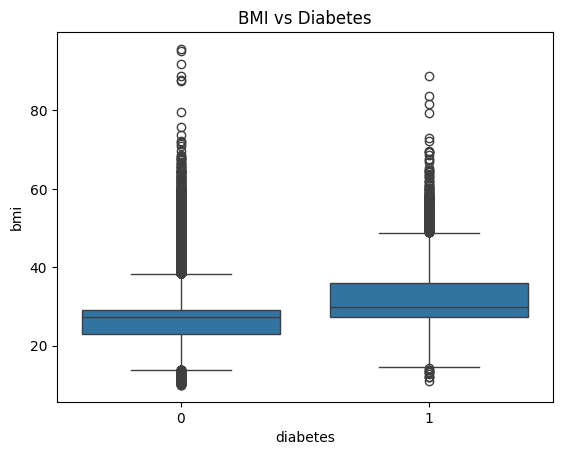

In [ ]:
#BMI vs Diabetes
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

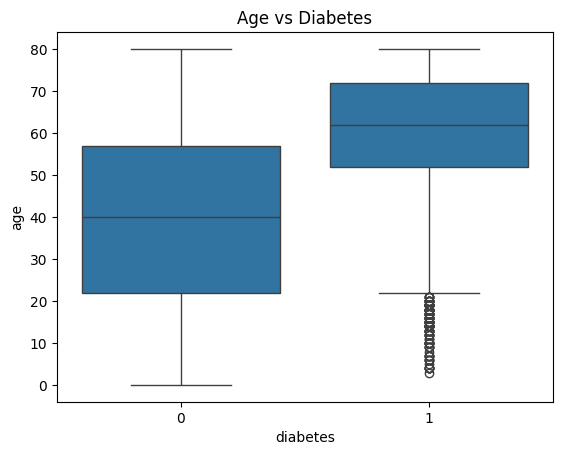

In [ ]:
#Age vs Diabetes
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

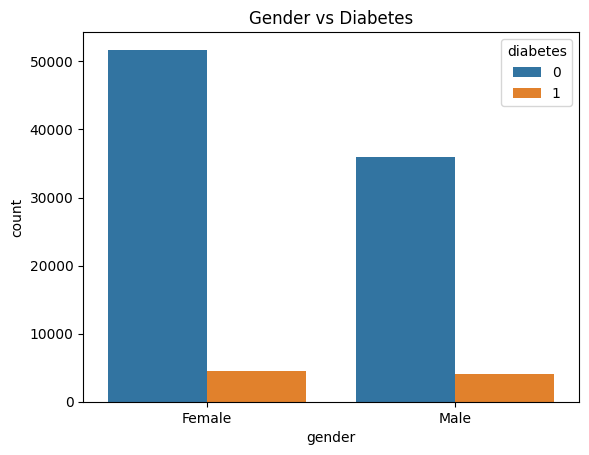

In [ ]:
#gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

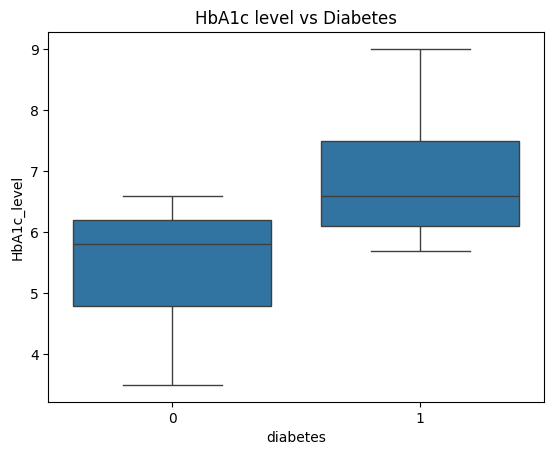

In [ ]:
#HbA1c level vs Diabetes
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

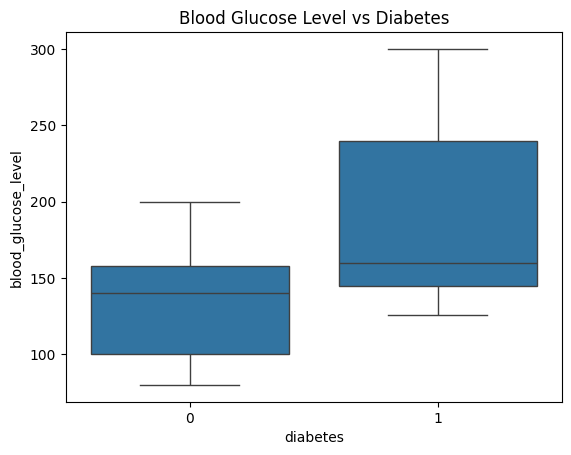

In [ ]:
#Blood Glucose level vs Diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

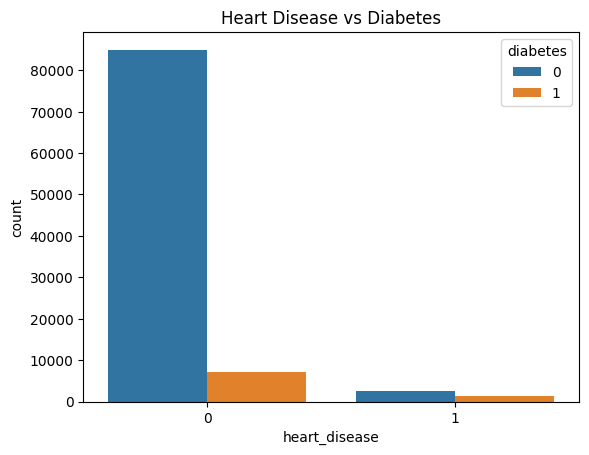

In [ ]:
#Heart Disease vs Diabetes
sns.countplot(x='heart_disease', hue='diabetes', data=df)
plt.title('Heart Disease vs Diabetes')
plt.show()

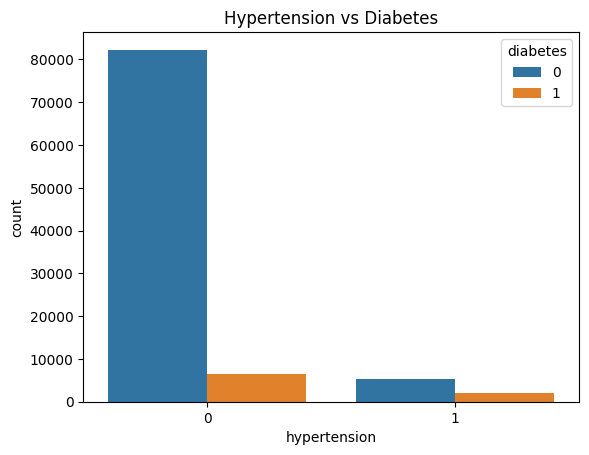

In [ ]:
#Hypertension vs Diabetes
sns.countplot(x='hypertension', hue='diabetes', data=df)
plt.title('Hypertension vs Diabetes')
plt.show()

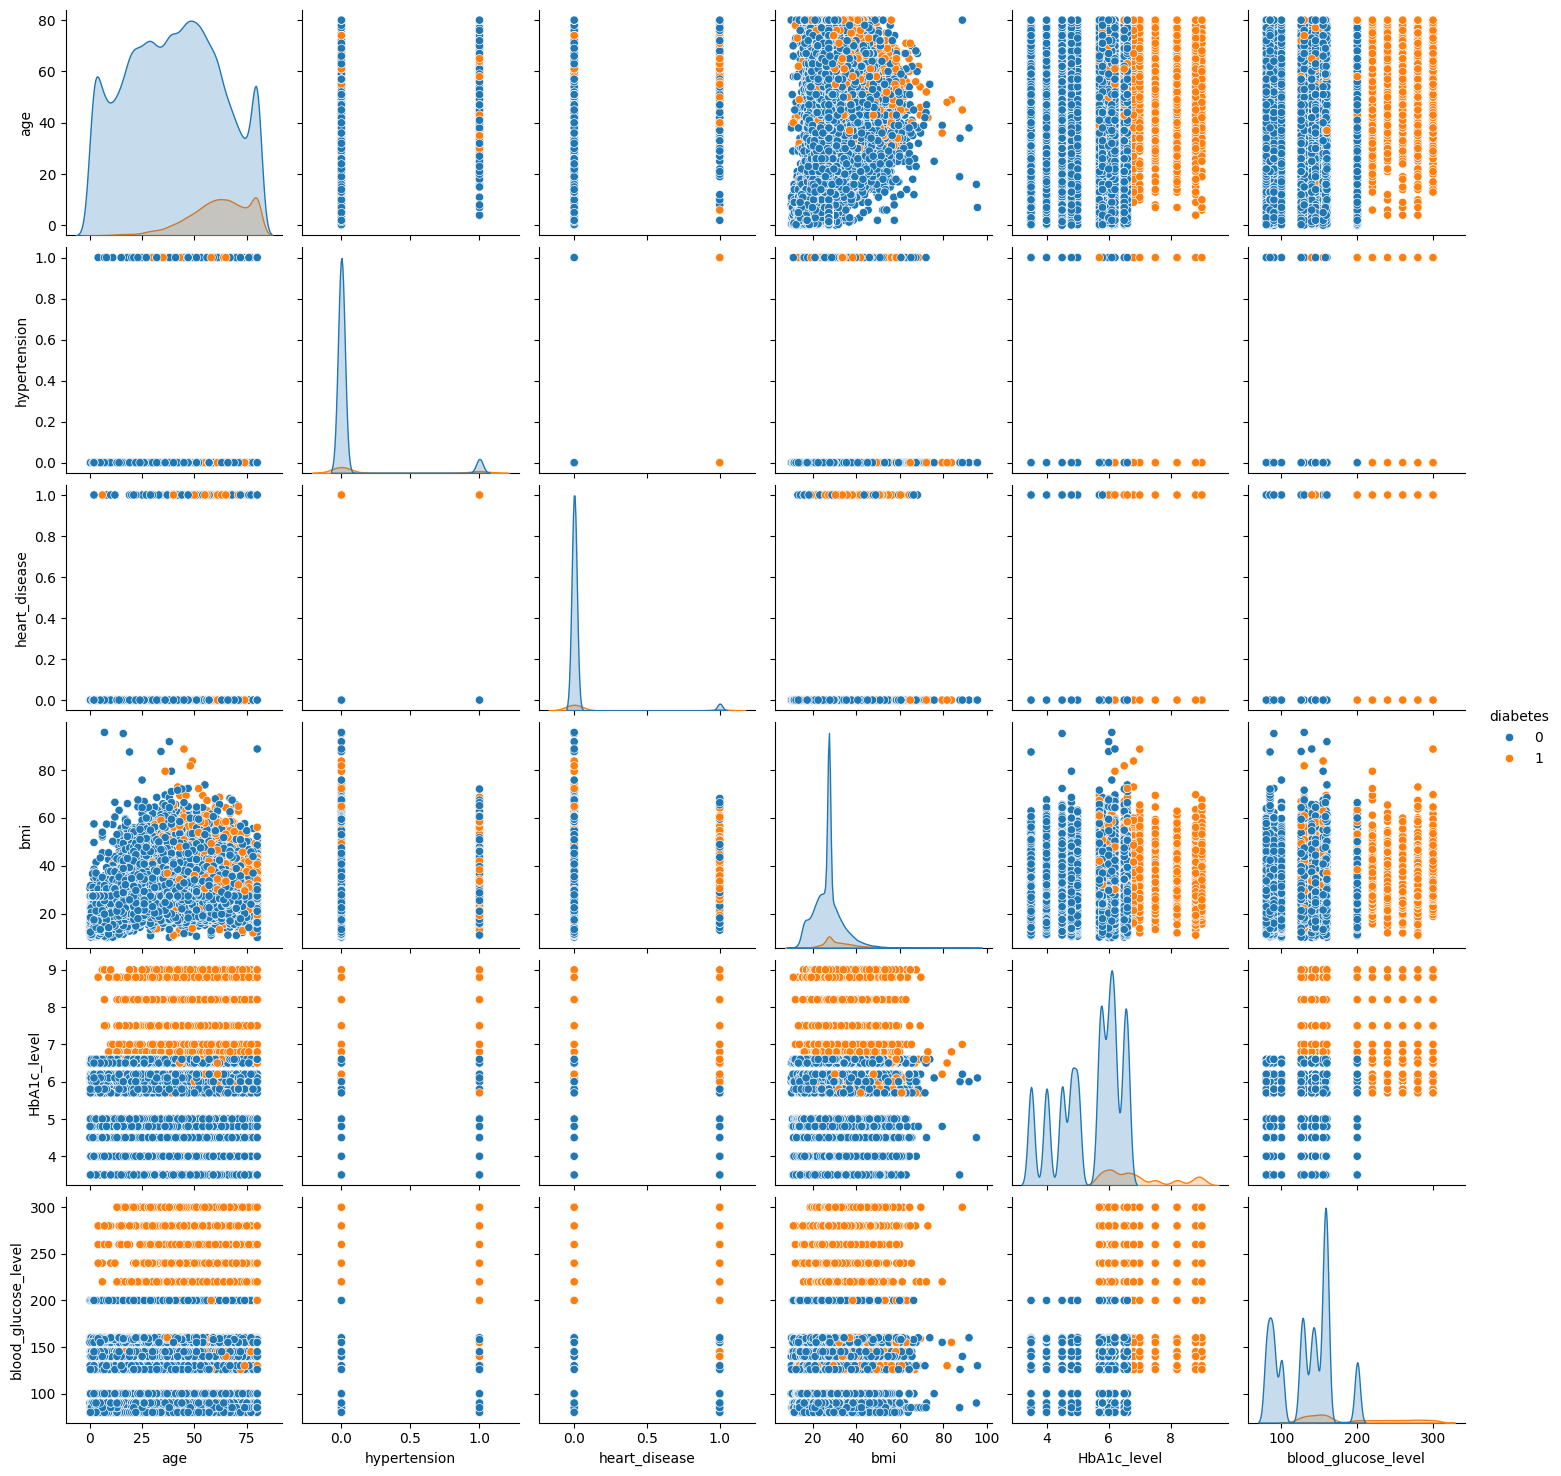

In [ ]:
sns.pairplot(df, hue='diabetes')
plt.show()

# 5. 🔧 Veri Ön İşleme

In [ ]:
# Smoking_History Sadeleştirme
def newSmoking(smokingStatus):
    if smokingStatus in ['never', 'No Info']:
        return 'non-smoker'
    elif smokingStatus == 'current':
        return 'current'
    elif smokingStatus in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Smoking_History Güncelleme
df['smoking_history'] = df['smoking_history'].apply(newSmoking)

# Yeni Değerler
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [ ]:
data = df.copy()

In [ ]:
#One Hot Encoding
def OHEncoding(df, columnName):
    #Yeni Sütunları Oluşturma
    dummies = pd.get_dummies(df[columnName], prefix=columnName)

    #Eski Sütunların Yerine Yeni Sütunları Getirme
    df = pd.concat([df.drop(columnName, axis=1), dummies], axis=1)
    return df

# One HOt Encoding Gendera uygulama
data = OHEncoding(data, 'gender')

# One HOt Encoding Smoking_History  uygulama
data = OHEncoding(data, 'smoking_history')

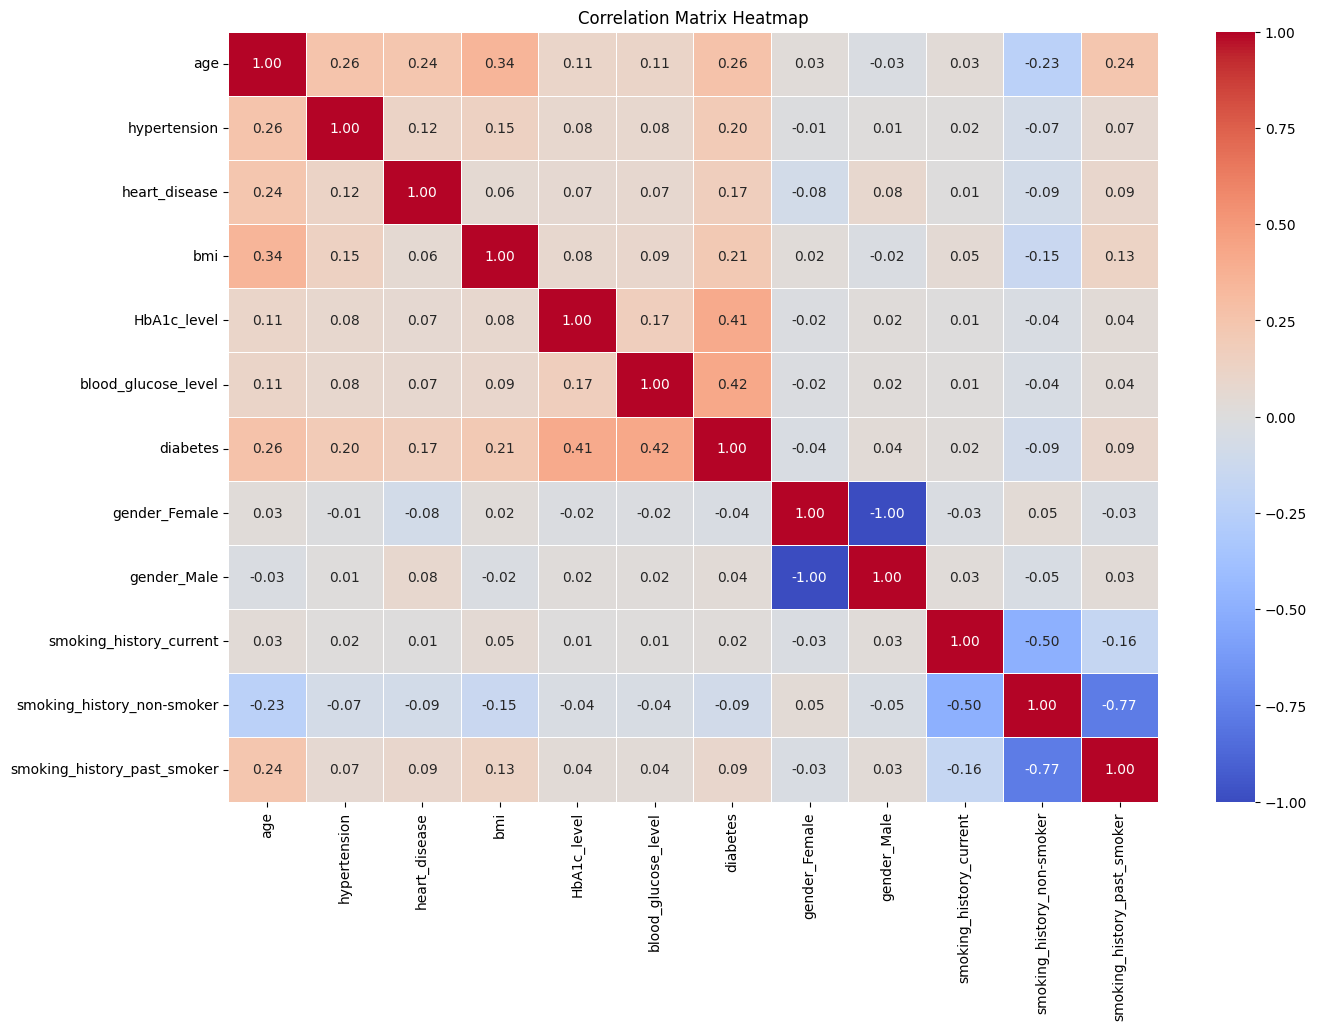

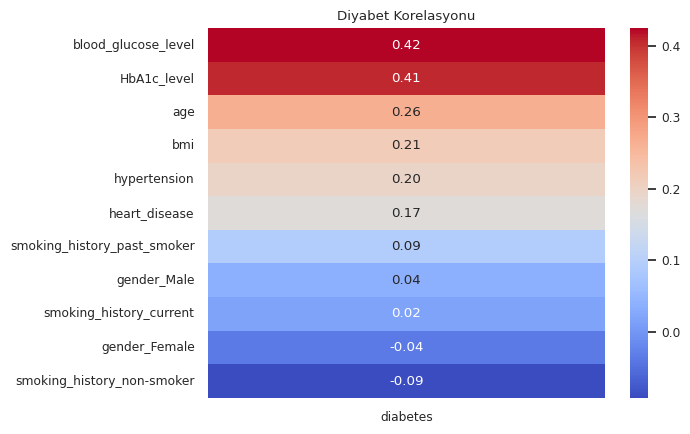

In [ ]:
#Korelasyon Matrisi
corrMatrix = data.corr()
#Grafik 1
plt.figure(figsize=(15, 10))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Grafik 2
corr = data.corr()
targetCorr = corr['diabetes'].drop('diabetes')

#Isı Haritasını Sıralama Azalan Şekilde
targetCorrSort = targetCorr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.heatmap(targetCorrSort.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Diyabet Korelasyonu')
plt.show()

### Veri Dengesizliği Düzenleme

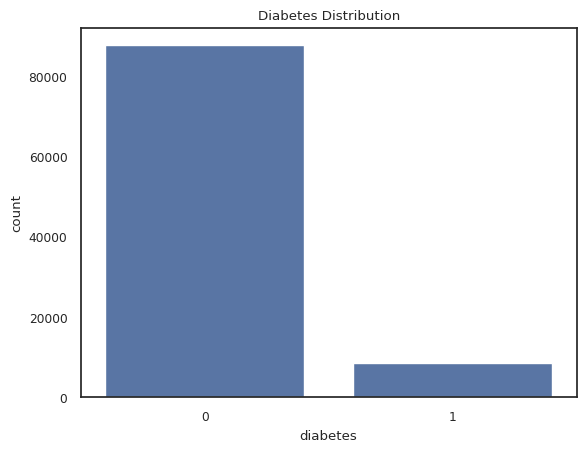

In [ ]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,87646
1,8482


In [ ]:
#Ornekleme
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
#Veri Ön İşleme
preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

#Sütunları Ayırma
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
# Pipeline Oluşturma
pipe = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])


# 7. 🤖 Model Seçimi ve Eğitimi

In [ ]:
#Hiperparametre Oluşturm
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# GridSearchCV Oluşturma
gridSearch = GridSearchCV(pipe, param_grid, cv=5)

# Train Test Setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Modeli Oluşturma
gridSearch.fit(X_train, y_train)

# En İyi Parametre
print("En İyi Parametre: ", gridSearch.best_params_)

En İyi Parametre:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}


# 8. 📊 Model Değerlendirme

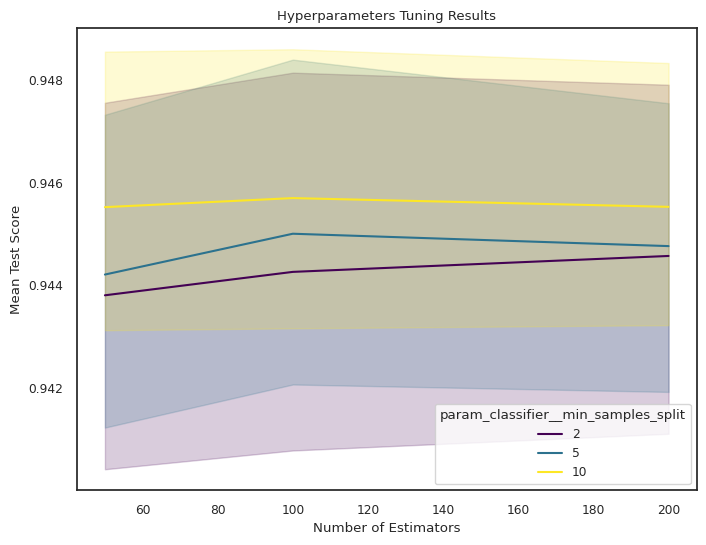

In [ ]:
# GridSearchCv Df atama Ve Görselleştirme
results_df = pd.DataFrame(gridSearch.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__min_samples_split', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

Model Accuracy:  0.9489233329865807
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226

ROC-AUC Score: 0.9731288551418524


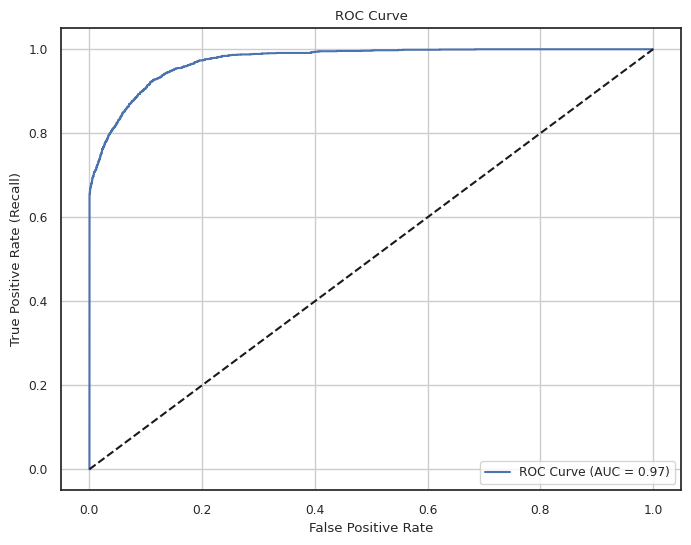

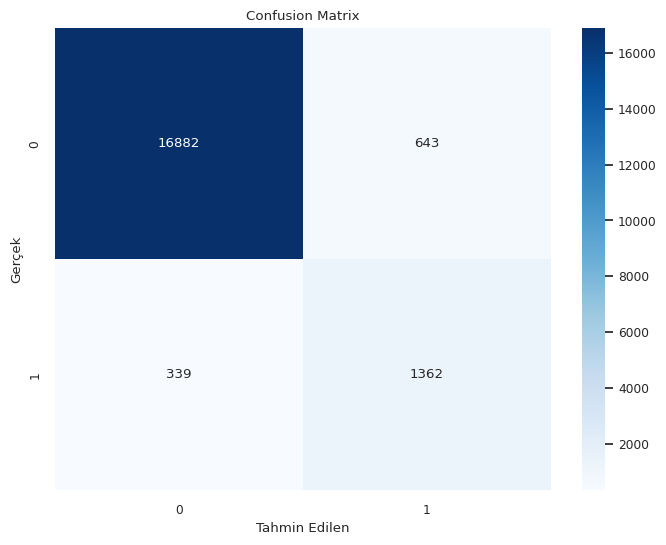

In [ ]:
# Test Kümesi üzerinden Tahminde bulunma
y_pred = gridSearch.predict(X_test)

# Model Değerlendirme

#Accuracy
print("Model Accuracy: ", accuracy_score(y_test, y_pred))

#Classification Report
print(classification_report(y_test, y_pred))#macro tüm sınıf weighted sınıf ortalaması

#ROC_AUC
y_probs = gridSearch.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # rastgele tahmin çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

In [ ]:
print("Train Accuracy:", gridSearch.score(X_train, y_train))
print("Test Accuracy :", gridSearch.score(X_test, y_test))


Train Accuracy: 0.9516267457283296
Test Accuracy : 0.9484552168937896


# 9. 📝 Sonuç ve Yorumlar



Bu projede, diyabet hastalığını tahmin etmeye yönelik geliştirilen makine öğrenmesi modeli oldukça yüksek başarı göstermiştir. Elde edilen performans metrikleri, modelin hem genel doğruluğunun hem de hasta sınıfını ayırt edebilme gücünün yüksek olduğunu göstermektedir.

### Modelin Güçlü Yönleri:
**Yüksek Genel Doğruluk:**
Model, %94.84 doğruluk ile test verisinde güçlü bir performans sergilemiştir.

**Güçlü ROC-AUC Skoru:**
ROC-AUC değeri 0.9735 olup, modelin pozitif ve negatif sınıfları birbirinden ayırma başarısının çok yüksek olduğunu göstermektedir.

**İyi Recall :**
Diyabetli bireyler için recall oranı %80’dir. Bu, modelin gerçek hasta olan kişilerin %80’ini başarıyla tespit ettiğini göstermektedir — sağlık uygulamaları için kritik bir özelliktir.

**Dengeli F1-Score:**
Pozitif sınıfta f1-score = 0.73, negatif sınıfta f1-score = 0.97 olarak hesaplanmıştır. Bu da modelin hem doğruluk hem hassasiyet arasında iyi bir denge kurduğunu gösterir.

### Modelin Zayıf Yönleri:
**Pozitif Sınıf İçin Düşük Precision (0.68):**
Model, hasta olmayan bazı bireyleri yanlışlıkla “hasta” olarak tahmin etmiş olabilir (false positive). Bu durum, gereksiz tetkiklere veya kaynak kullanımına yol açabilir.

**Veri Dengesizliği:**
diabetes=1 sınıfı, veri setinde çok daha az sayıda örneğe sahiptir. SMOTE ve undersampling gibi yöntemlerle bu durum dengelenmiş olsa da, doğal dengesizlik modelin öğrenme sürecini etkilemiş olabilir.

**Tıbbi Verinin Belirsizliği:**
Gerçek dünyada tıbbi tanılar her zaman kesin olmayabilir. Özellikle "No Info" gibi kategorilerin non-smoker ile birleştirilmesi gibi veri temizleme adımları, potansiyel bilgi kaybı yaratabilir.

### Olası Hata Kaynakları:
Eksik ya da yanıltıcı veri (örneğin BMI uç değerleri)

Sigara geçmişi gibi metinsel verilerin yeniden sınıflandırılması

Veri setinin sınıflar arası dengesizliği

### Genel Değerlendirme:
Bu proje kapsamında geliştirilen model, diyabet hastalığının tahmini için oldukça başarılıdır. Özellikle gerçek pozitif hastaları yakalama oranı yüksek (recall = 0.80) olduğu için erken tanı açısından değerli bir araç olabilir. ROC-AUC değeri 0.97'nin üzerinde olan modeller genellikle yüksek ayrım gücüne sahip kabul edilir.

